In [ ]:
import pandas as pd
import numpy as np
from numpy.linalg import eig
import matplotlib.pyplot as plt
import pandas as pd

Effectuer une ACP sur ces données en prenant soin d'extraire les données pertinentes pour effectuer la classification d'abord sur l'espèce (sp), puis sur le sexe (sex) et enfin en croisant espèce et sexe.

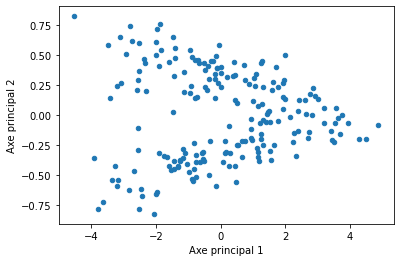

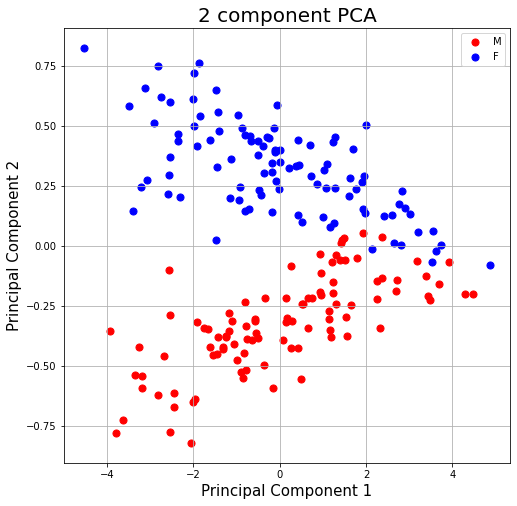

In [1]:

import pandas as pd
import numpy as np
from numpy.linalg import eig
import matplotlib.pyplot as plt
import pandas as pd
data = pd.read_csv("../data/crabs.csv") 
data.head(2)
x=data.iloc[:,4:8].values
from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(x)#ok
from sklearn.decomposition import PCA as sklearnPCA
pca = sklearnPCA(n_components = 2)
principalComponents = pca.fit_transform(x)
principaldf = pd.DataFrame(data = principalComponents, columns = ['Axe principal 1', 'Axe principal 2'])
principaldf.head(2)
import matplotlib.pyplot as plt
finaldf = pd.concat([principaldf, data[['sex']]], axis = 1)
finaldf.head(100)
finaldf.plot.scatter(x='Axe principal 1', y='Axe principal 2')




fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['M', 'F']
colors = ['r','b']
for target, color in zip(targets,colors):
    indicesToKeep = finaldf['sex'] == target
    ax.scatter(finaldf.loc[indicesToKeep, 'Axe principal 1']
               , finaldf.loc[indicesToKeep, 'Axe principal 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()
